# Spaceship Titanic

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('train.csv')

## EDA and Feature Engineering

In [29]:
data.shape

(8693, 14)

In [30]:
data.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [32]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [33]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

### As Earth has the maximum travellers, we will assume that the travellers with unknown home planets belong to Earth

In [34]:
data['HomePlanet'] = data['HomePlanet'].fillna('Earth')

In [35]:
data['CryoSleep'].value_counts()
data['Destination'].value_counts()
data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [57]:
# data['Side'].value_counts()
# data['Dock'].value_counts()
data['Num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Num, Length: 1817, dtype: int64

### Same for CryoSleep, Destination and IsVIP

In [36]:
data['CryoSleep'] = data['CryoSleep'].fillna(False)
data['Destination'] = data['Destination'].fillna('TRAPPIST-1e')
data['VIP'] = data['VIP'].fillna(False)

### We will take mean of ages to fill in null values and also for other numerical values

In [37]:
data['Age'] = data['Age'].fillna(np.around(np.mean(data['Age']),0))

purchases = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for purchase in purchases:
    data[purchase] = data[purchase].fillna(np.around(np.mean(data[purchase]), 0))

### Names do not pose as features so we will not worry about the null values

### For now I am removing the columns with NaN values for Cabin as any random value will affect the result in a negative way

In [38]:
data = data.drop('Name', axis=1)
data = data.drop('PassengerId', axis=1)
data = data.dropna()

In [39]:
data.shape

(8494, 12)

In [40]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [41]:
data[['Dock', 'Num', 'Side']] = data['Cabin'].str.split('/', expand=True)

In [42]:
data = data.drop('Cabin', axis=1)

/var/folders/lg/wvxh7qj12gv3ql6vgm6gp6pw0000gn/T/ipykernel_92521/3251130202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr = data.corr()


<AxesSubplot: >

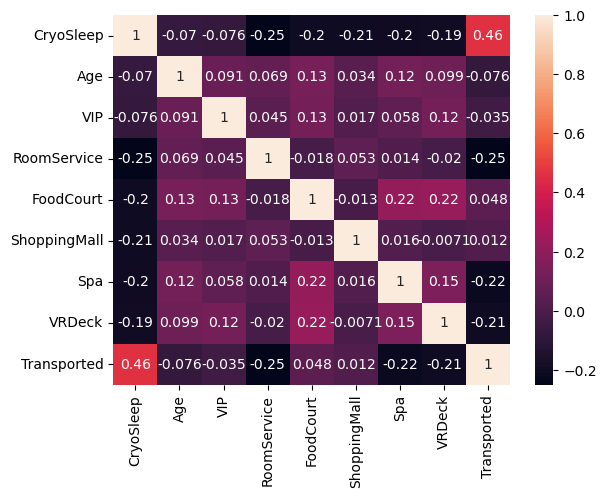

In [43]:
datacorr = data.corr()
datacorr
sns.heatmap(datacorr, annot=True)

## Encoding Categorical Variables

In [44]:
# One hot encoding
test = pd.get_dummies(data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Side', 'Dock'], drop_first=True)

In [45]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,...,VIP_True,Transported_True,Side_S,Dock_B,Dock_C,Dock_D,Dock_E,Dock_F,Dock_G,Dock_T
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [46]:
test['Num'] = test['Num'].astype('int')

In [47]:
X = test.drop('Transported_True', axis=1).values
y = test['Transported_True'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [48]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n {confusion_matrix(y_test,y_pred)}")

Accuracy: 0.7801318267419962 
 [[730 333]
 [134 927]]


In [50]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [51]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [52]:
test_data['HomePlanet'].fillna('Earth')
test_data['CryoSleep'].fillna(False)
test_data['Destination'].fillna('TRAPPIST-1e')
test_data['VIP'].fillna(False)

0       False
1       False
2       False
3       False
4       False
        ...  
4272    False
4273    False
4274    False
4275    False
4276    False
Name: VIP, Length: 4277, dtype: bool